## Case Data Science - Guilherme P Bergamo

Uma administradora de planos de saúde precisa desenvolver um modelo preditivo que estima o custo médio anual gasto por cliente. Sua missão será de desenvolver uma modelagem preditiva baseada em algumas informações cadastrais. A administradora tem em mãos uma base de teste para posterior avaliação de performance da sua modelagem final.
O resultado de seu estudo será encaminhado para as áreas de negócio para validação funcional.

Os dados para esse case estão divididos em dois arquivos:

• Seguro Saúde - Modelagem: contém os dados para modelagem e o dicionário das variáveis

• Seguro Saúde - Teste Final: contém os dados para teste, com valores preenchidos no campo da variável resposta

## Etapas do projeto:
1. Definição do Problema de Negócio e Objetivo do projeto
2. Coleta e preparação dos dados
3. Análise Exploratória de Dados
4. Pré-processamento de Dados
5. Modelagem e Avaliação do Modelo
6. Interpretação dos Resultados
7. Deploy do Modelo
8. Aplicação do Modelo

### 1. Definição do Problema de Negócio e Objetivo do projeto

#### Problema de Negócio
A problemática enfrentada pela administradora de planos de saúde é a dificuldade em estimar de forma precisa o custo médio anual gasto por cliente. A falta de um modelo preditivo baseado em informações cadastrais impede uma gestão financeira eficaz, levando à necessidade de desenvolver um sistema que antecipe e compreenda os custos associados aos clientes para melhorar a tomada de decisões e otimizar recursos.
#### Objetivo do projeto
Desenvolver um modelo preditivo que utilize informações cadastrais para estimar com precisão o custo médio anual gasto por cliente em um plano de saúde. O objetivo é fornecer à administradora ferramentas preditivas eficazes, permitindo uma gestão financeira mais acertiva, identificação de padrões de gastos e otimização de recursos, contribuindo para uma tomada de decisão estratégica e eficiente.

### 2. Coleta e preparação dos dados
Aqui iremos carregar nossa base de dados e transformá-la em um dataframe do pandas, para que seja possível realizar todas as transformações necessárias para a análise e posterior criação do modelo.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import joblib
import pickle

In [2]:
#Carregando os dados e transformando o arquivo xlsx em um dataframe do pandas
healthdf = pd.read_excel('C:/Users/guipi/Desktop/case/Seguro Saúde - Modelagem.xlsx', sheet_name='MODELAGEM', engine='openpyxl')
healthdf

,MATRICULA,IDADE,NASCIMENTO,SEXO,IMC,FILHOS,FUMANTE,SIGNO,REGIÃO,FACEBOOK,CLASSE,VALOR
0,207,56.0,1963-12-31,M,39.600,0.0,0.0,Capricórnio,3.0,0.0,7.0,3242.022018
1,852,32.0,1987-10-16,F,37.145,3.0,0.0,Libra,2.0,1.0,2.0,1937.108119
2,463,47.0,1973-01-23,F,24.100,1.0,0.0,Aquário,3.0,1.0,7.0,8023.418951
3,628,41.0,1979-01-08,M,30.780,3.0,1.0,Capricórnio,2.0,1.0,6.0,12109.298838
4,1100,23.0,1996-10-07,M,37.100,3.0,0.0,Libra,3.0,1.0,4.0,1100.182263
...,...,...,...,...,...,...,...,...,...,...,...,...
1206,71,61.0,1958-05-26,F,36.385,1.0,1.0,Gêmeos,2.0,0.0,10.0,14837.175275
1207,1198,20.0,2000-02-11,F,31.920,0.0,0.0,Aquário,4.0,1.0,5.0,691.611254
1208,983,27.0,1992-06-04,F,36.080,0.0,1.0,Gêmeos,1.0,1.0,10.0,11355.932171
1209,299,52.0,1967-05-15,M,32.775,3.0,0.0,Touro,4.0,0.0,1.0,3452.326988


In [3]:
#Linhas e colunas do dataframe
healthdf.shape

(1211, 12)

In [4]:
#Verificando informações sobre os dados: tipos e quantidades não-nulas
healthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MATRICULA   1211 non-null   int64         
 1   IDADE       1206 non-null   float64       
 2   NASCIMENTO  1203 non-null   datetime64[ns]
 3   SEXO        1204 non-null   object        
 4   IMC         1206 non-null   float64       
 5   FILHOS      1203 non-null   float64       
 6   FUMANTE     1203 non-null   float64       
 7   SIGNO       1205 non-null   object        
 8   REGIÃO      1205 non-null   float64       
 9   FACEBOOK    1208 non-null   float64       
 10  CLASSE      1206 non-null   float64       
 11  VALOR       1211 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 113.7+ KB


In [5]:
#Lidando com os valores nulos.
missing = healthdf.isnull().sum()
missing

MATRICULA     0
IDADE         5
NASCIMENTO    8
SEXO          7
IMC           5
FILHOS        8
FUMANTE       8
SIGNO         6
REGIÃO        6
FACEBOOK      3
CLASSE        5
VALOR         0
dtype: int64

In [6]:
#Deletando as linhas que possuem valores nulos, para que a análise não seja afetada pela inconsistência dos dados.
healthdf = healthdf.dropna()
healthdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MATRICULA   1160 non-null   int64         
 1   IDADE       1160 non-null   float64       
 2   NASCIMENTO  1160 non-null   datetime64[ns]
 3   SEXO        1160 non-null   object        
 4   IMC         1160 non-null   float64       
 5   FILHOS      1160 non-null   float64       
 6   FUMANTE     1160 non-null   float64       
 7   SIGNO       1160 non-null   object        
 8   REGIÃO      1160 non-null   float64       
 9   FACEBOOK    1160 non-null   float64       
 10  CLASSE      1160 non-null   float64       
 11  VALOR       1160 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 117.8+ KB


In [7]:
#arquivo = 'ExcelModelagem.xlsx'
#healthdf.to_excel(arquivo, index=False, engine='openpyxl')

### 3.Análise Exploratória e Visualização dos dados

A Análise Exploratória de Dados é uma fase que envolve a compreensão dos dados. Por meio de estatísticas descritivas, visualizações e identificação de padrões,essencial para gerar insights cruciais, detectar outliers e orientar escolhas de modelagem.

In [8]:
#Estatísticas descritivas das variáveis
healthdf.describe()

,MATRICULA,IDADE,IMC,FILHOS,FUMANTE,REGIÃO,FACEBOOK,CLASSE,VALOR
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,666.639655,39.318966,30.730543,1.100000,0.197414,2.458621,0.686207,5.403448,4030.078692
std,383.766018,13.943928,6.116144,1.205538,0.398219,1.136125,0.464234,2.854116,3726.060413
min,1.000000,18.000000,15.960000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,336.750000,27.000000,26.315000,0.000000,0.000000,1.000000,0.000000,3.000000,1443.328265
50%,661.500000,40.000000,30.500000,1.000000,0.000000,2.000000,1.000000,5.000000,2801.024564
75%,1000.500000,51.000000,34.800000,2.000000,0.000000,3.000000,1.000000,8.000000,4858.986998
max,1338.000000,64.000000,53.130000,5.000000,1.000000,4.000000,1.000000,10.000000,19501.659942


In [9]:
#Verificando se há valores 0 que possam estar errados -> Principalmente Valor, Idade, IMC
print((healthdf == 0).sum())

MATRICULA       0
IDADE           0
NASCIMENTO      0
SEXO            0
IMC             0
FILHOS        493
FUMANTE       931
SIGNO           0
REGIÃO          0
FACEBOOK      364
CLASSE          0
VALOR           3
dtype: int64


In [10]:
#Removendo as colunas Signo,Nascimento e Facebook, pois não serão relevantes em nossa análise.
healthdf = healthdf.drop(axis = 1, columns=['SIGNO','FACEBOOK','NASCIMENTO'])
healthdf.head()

,MATRICULA,IDADE,SEXO,IMC,FILHOS,FUMANTE,REGIÃO,CLASSE,VALOR
0,207,56.0,M,39.600,0.0,0.0,3.0,7.0,3242.022018
1,852,32.0,F,37.145,3.0,0.0,2.0,2.0,1937.108119
2,463,47.0,F,24.100,1.0,0.0,3.0,7.0,8023.418951
3,628,41.0,M,30.780,3.0,1.0,2.0,6.0,12109.298838
4,1100,23.0,M,37.100,3.0,0.0,3.0,4.0,1100.182263


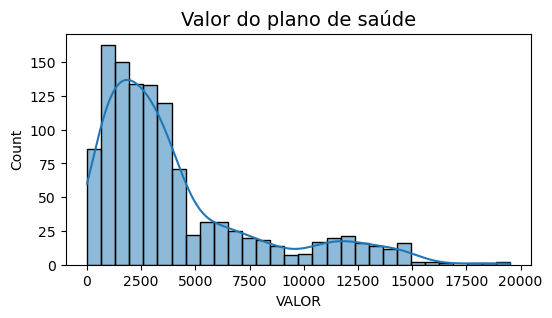

In [11]:
#Visualizando a distribuição dos valores
plt.figure(figsize=(6,3))
sns.histplot(healthdf['VALOR'], kde=True)
plt.title('Valor do plano de saúde', fontsize=14)
plt.show()

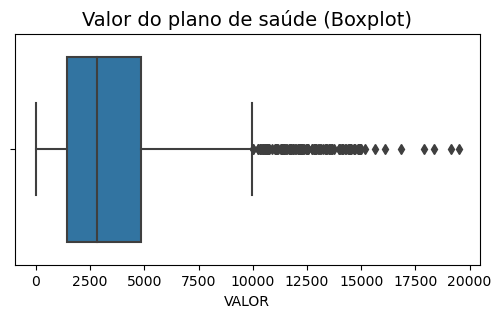

In [12]:
#Boxplot - verificação de outliers
plt.figure(figsize=(6,3))
sns.boxplot(x= healthdf['VALOR'])
plt.title('Valor do plano de saúde (Boxplot)', fontsize=14)
plt.show()

In [13]:
#Removendo os valores outliers, retirando o primeiro e o último percentil, em relação a coluna VALOR
limite_inferior = healthdf['VALOR'].quantile(0.01)
limite_superior = healthdf['VALOR'].quantile(0.99)

healthdf['VALOR'] = healthdf['VALOR'].clip(lower=limite_inferior, upper=limite_superior)
healthdf.describe()

,MATRICULA,IDADE,IMC,FILHOS,FUMANTE,REGIÃO,CLASSE,VALOR
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,666.639655,39.318966,30.730543,1.100000,0.197414,2.458621,5.403448,4014.189443
std,383.766018,13.943928,6.116144,1.205538,0.398219,1.136125,2.854116,3666.891881
min,1.000000,18.000000,15.960000,0.000000,0.000000,1.000000,1.000000,379.996343
25%,336.750000,27.000000,26.315000,0.000000,0.000000,1.000000,3.000000,1443.328265
50%,661.500000,40.000000,30.500000,1.000000,0.000000,2.000000,5.000000,2801.024564
75%,1000.500000,51.000000,34.800000,2.000000,0.000000,3.000000,8.000000,4858.986998
max,1338.000000,64.000000,53.130000,5.000000,1.000000,4.000000,10.000000,14885.125978


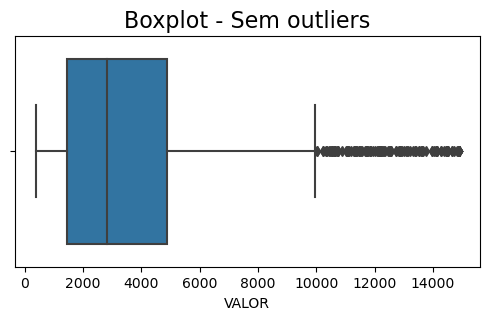

In [14]:
#Boxplot - verificação pós remoção de outliers
plt.figure(figsize=(6,3))
sns.boxplot(x= healthdf['VALOR'])
plt.title('Boxplot - Sem outliers', fontsize=16)
plt.show()

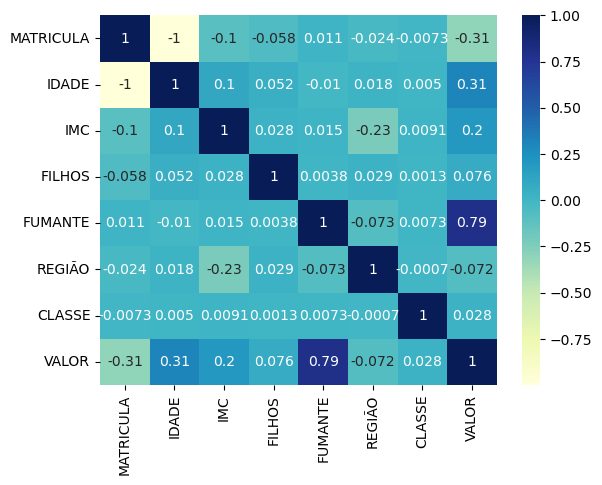

In [15]:
#Matriz de Correlação
sns.heatmap(healthdf.corr(), annot=True, cmap='YlGnBu')
plt.show()

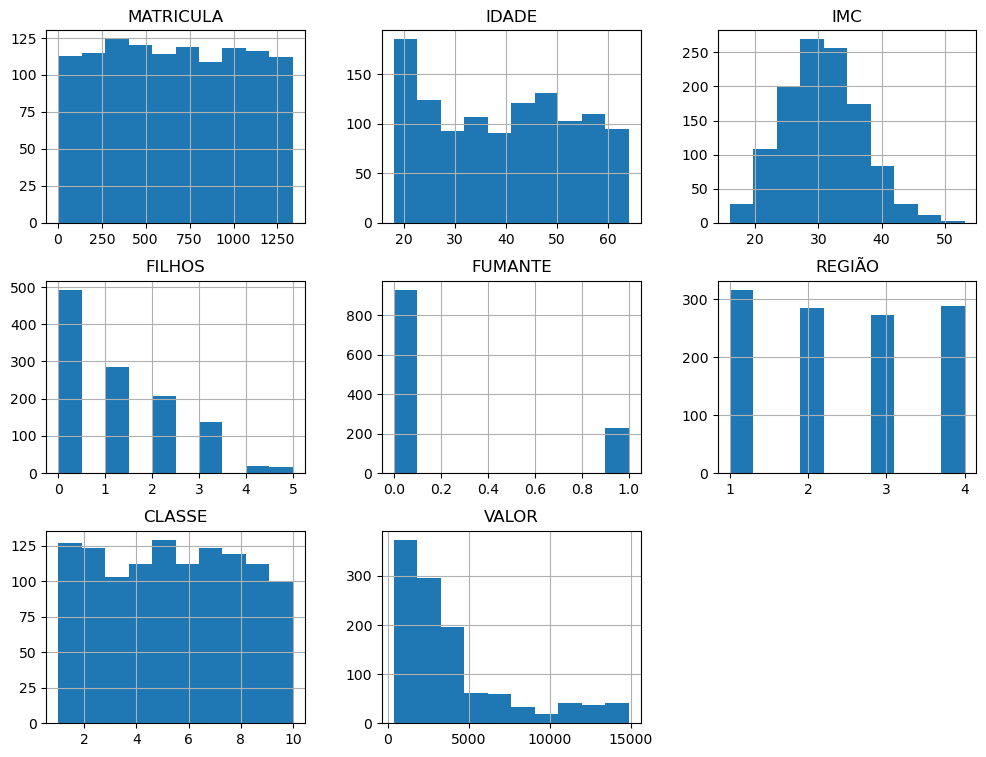

In [16]:
#Histogramas
healthdf.hist(figsize=(12, 9))
plt.show()

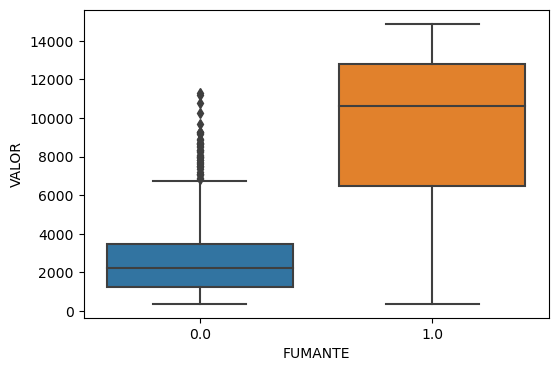

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='FUMANTE', y='VALOR', data=healthdf)
plt.show()

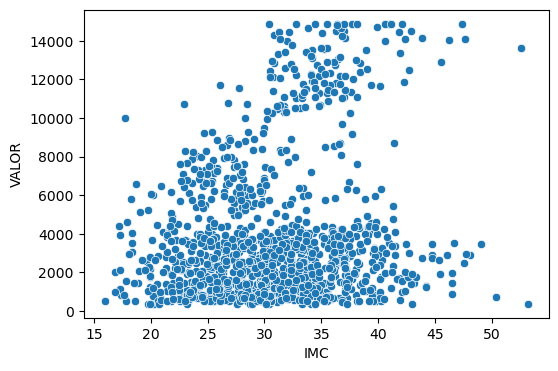

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='IMC', y='VALOR', data=healthdf)
plt.show()

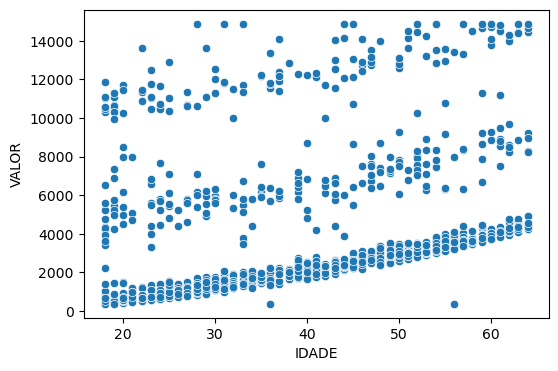

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='IDADE', y='VALOR', data=healthdf)
plt.show()

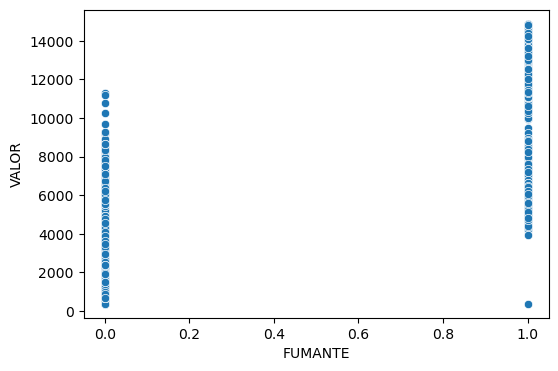

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='FUMANTE', y='VALOR', data=healthdf)
plt.show()

### 4. Pré-processamento de Dados
Usando a abordagem de one-hot-encoding, criamos colunas dummies para transformar a coluna 'SEXO', que é categórica, em duas colunas 'numéricas', com valores de 0 ou 1, sendo 0 False e 1 True.

Também iremos gerar dummies para as colunas 'REGIÃO' e 'CLASSE', para que cada região e cada classe tenha a sua coluna específica, e seu impacto seja melhor percebido pelo modelo.

In [21]:
#One hot encoding
healthdf = pd.get_dummies(healthdf, columns=['SEXO'], prefix='SEXO', drop_first=False, dtype='int64')
healthdf = pd.get_dummies(healthdf, columns=['REGIÃO'], prefix='REGIÃO', drop_first=False, dtype='int64')
healthdf = pd.get_dummies(healthdf, columns=['CLASSE'], prefix='CLASSE', drop_first=False, dtype='int64')

healthdf.head(2)

,MATRICULA,IDADE,IMC,FILHOS,FUMANTE,VALOR,SEXO_F,SEXO_M,REGIÃO_1.0,REGIÃO_2.0,...,CLASSE_1.0,CLASSE_2.0,CLASSE_3.0,CLASSE_4.0,CLASSE_5.0,CLASSE_6.0,CLASSE_7.0,CLASSE_8.0,CLASSE_9.0,CLASSE_10.0
0,207,56.0,39.600,0.0,0.0,3242.022018,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,852,32.0,37.145,3.0,0.0,1937.108119,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [22]:
healthdf.columns

Index(['MATRICULA', 'IDADE', 'IMC', 'FILHOS', 'FUMANTE', 'VALOR', 'SEXO_F',
       'SEXO_M', 'REGIÃO_1.0', 'REGIÃO_2.0', 'REGIÃO_3.0', 'REGIÃO_4.0',
       'CLASSE_1.0', 'CLASSE_2.0', 'CLASSE_3.0', 'CLASSE_4.0', 'CLASSE_5.0',
       'CLASSE_6.0', 'CLASSE_7.0', 'CLASSE_8.0', 'CLASSE_9.0', 'CLASSE_10.0'],
      dtype='object')

In [23]:
ordemcolunas = ['MATRICULA', 'IDADE', 'IMC', 'FILHOS', 'FUMANTE', 
       'SEXO_F', 'SEXO_M', 'REGIÃO_1.0', 'REGIÃO_2.0', 'REGIÃO_3.0',
       'REGIÃO_4.0', 'CLASSE_1.0', 'CLASSE_2.0', 'CLASSE_3.0', 'CLASSE_4.0',
       'CLASSE_5.0', 'CLASSE_6.0', 'CLASSE_7.0', 'CLASSE_8.0', 'CLASSE_9.0',
       'CLASSE_10.0', 'VALOR']
healthdf = healthdf[ordemcolunas]

Separação das características independentes e dependentes:

In [24]:
X = healthdf.iloc[:,:-1]
Y = healthdf.iloc[:, -1]

In [25]:
X.head()

,MATRICULA,IDADE,IMC,FILHOS,FUMANTE,SEXO_F,SEXO_M,REGIÃO_1.0,REGIÃO_2.0,REGIÃO_3.0,...,CLASSE_1.0,CLASSE_2.0,CLASSE_3.0,CLASSE_4.0,CLASSE_5.0,CLASSE_6.0,CLASSE_7.0,CLASSE_8.0,CLASSE_9.0,CLASSE_10.0
0,207,56.0,39.600,0.0,0.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,852,32.0,37.145,3.0,0.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,463,47.0,24.100,1.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,628,41.0,30.780,3.0,1.0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1100,23.0,37.100,3.0,0.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
Y.head()

0     3242.022018
1     1937.108119
2     8023.418951
3    12109.298838
4     1100.182263
Name: VALOR, dtype: float64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

### 5. Modelagem e  Avaliação do Modelo

Vamos criar e avaliar os seguintes modelos:
- Regressão Linear (Normal e Ridge)
- Árvore de Decisão
- Random Forest (com os melhores parâmetros)

O modelo final escolhido será o que apresentar os melhores scores.

In [28]:
#Regressão Linear
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, Y_train)

#Predição:
Y_pred = LinearRegression.predict(X_test)

#Scores
print("R2 Score:",r2_score(Y_test, Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test, Y_pred))

R2 Score: 0.654290721523298
Mean Squared Error: 3940327.8393091513


O r2_score varia de 0 a 1, e nesse caso deu 0.64, um valor mediano. Quanto mais próximo de 1, mais o modelo é capaz de explicar uma grande parte da variabilidade nos dados.

Já o mean_squared_error mede o quanto as previsões do modelo se desviam dos valores reais.

In [29]:
#Regressão Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, Y_train)

#Predição
Y_pred = Ridge.predict(X_test)

#Scores
print("R2 Score:",r2_score(Y_test, Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test, Y_pred))

R2 Score: 0.6550563405237351
Mean Squared Error: 3931601.4612523653


In [30]:
#Árvore de Decisão
decision_tree_model = DecisionTreeRegressor(max_depth=3, ccp_alpha=3)
decision_tree_model.fit(X_train, Y_train)

#Prediction
Y_pred = decision_tree_model.predict(X_test)

#Scores
print("R2 Score:", r2_score(Y_test, Y_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))

R2 Score: 0.7688898704363444
Mean Squared Error: 2634148.78963796


In [31]:
#Random Forest com os melhores hiperparametros - utilizando o Grid Search (Pode demorar de 1 a 2 minutos para rodar)
param_grid = {'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto']}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

#Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, Y_train)

#Previsão
Y_pred = best_rf_model.predict(X_test)

#Scores
print("R2 Score:", r2_score(Y_test, Y_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))

R2 Score: 0.7759740019000444
Mean Squared Error: 2553405.222248796


### 6. Interpretação dos Resultados - Eficácia do Modelo
Gráficos são muito úteis para que possamos visualizar como nosso modelo performou, além dos scores numéricos, como o R2 e o MQE.

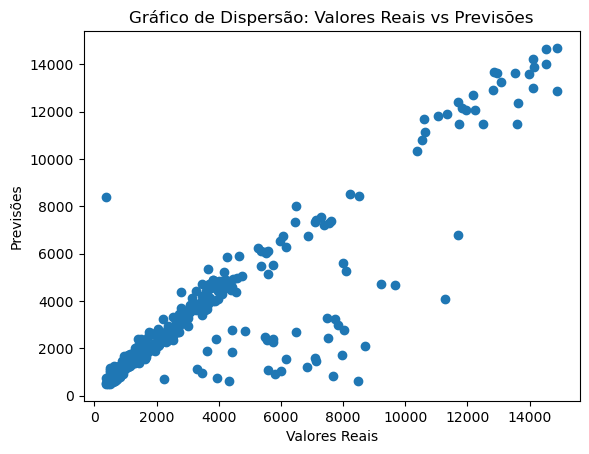

In [32]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs Previsões")
plt.show()

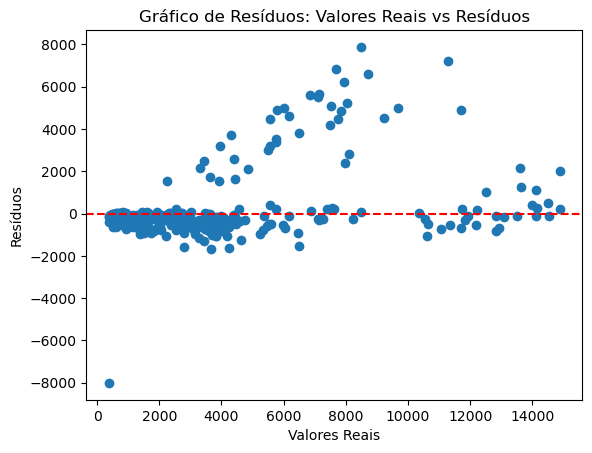

In [33]:
residuals = Y_test - Y_pred
plt.scatter(Y_test, residuals)
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos: Valores Reais vs Resíduos")
plt.axhline(y=0, color='r', linestyle='--')  # Adiciona linha horizontal em y=0
plt.show()

### 7. Deploy do Modelo
Podemos criar um arquivo com o nosso modelo criado, para que ele seja aplicado em outros notebooks, situações ou outra fonte de dados.

In [34]:
#Criando um arquivo pickle para deploy do modelo de random forest:
filename = 'CustoSeguroSaude.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

### 8. Aplicação do Modelo
No nosso caso, iremos aplicar o modelo em uma outra base de dados, o 'Seguro Saúde - Teste Final'. Para isso, precisamos carregar o arquivo e realizar as mesmas transformações que foram realizadas para que a base de dados esteja alinhada com o modelo que será aplicado.

In [35]:
#Utilizando o modelo na base de teste para avaliação de performance da modelagem final.
dffinal = pd.read_excel('C:/Users/guipi/Desktop/case/Seguro Saúde - Teste Final.xlsx', sheet_name='Gabarito', engine='openpyxl')
dffinal

,MATRICULA,IDADE,NASCIMENTO,SEXO,IMC,FILHOS,FUMANTE,SIGNO,REGIÃO,FACEBOOK,CLASSE,VALOR
0,1123,22.0,1997-07-27,F,21.280,3.0,0,Leão,4.0,1.0,4,1313.844404
1,743,36.0,1983-08-12,F,25.840,0.0,0,Leão,4.0,1.0,4,1610.509358
2,1151,21.0,1998-06-20,M,28.975,0.0,0,Gêmeos,4.0,1.0,5,582.984174
3,451,47.0,1972-09-22,M,25.460,2.0,0,Virgem,2.0,1.0,4,2821.179327
4,12,64.0,1955-11-17,F,30.115,3.0,0,NaN,4.0,0.0,6,5032.326560
...,...,...,...,...,...,...,...,...,...,...,...,...
122,584,42.0,1977-05-22,M,24.640,0.0,1,Gêmeos,1.0,1.0,5,5968.055535
123,1219,19.0,2000-08-03,M,17.480,0.0,0,Leão,4.0,1.0,8,495.822691
124,857,32.0,1988-01-03,F,23.650,1.0,0,Capricórnio,1.0,1.0,4,5390.287312
125,352,51.0,1969-03-16,F,38.060,0.0,1,Peixes,1.0,0.0,2,13578.105933


In [36]:
#Precisaremos realizar o mesmo pré-processamento nesse dataframe, para que seja possível rodar o modelo.
dffinal.isnull().sum()

MATRICULA     0
IDADE         1
NASCIMENTO    0
SEXO          1
IMC           1
FILHOS        1
FUMANTE       0
SIGNO         1
REGIÃO        1
FACEBOOK      2
CLASSE        0
VALOR         0
dtype: int64

In [37]:
#O primeiro passo é deletar as linhas com valores nulos.
dffinal = dffinal.dropna()

In [38]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 125
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MATRICULA   119 non-null    int64         
 1   IDADE       119 non-null    float64       
 2   NASCIMENTO  119 non-null    datetime64[ns]
 3   SEXO        119 non-null    object        
 4   IMC         119 non-null    float64       
 5   FILHOS      119 non-null    float64       
 6   FUMANTE     119 non-null    int64         
 7   SIGNO       119 non-null    object        
 8   REGIÃO      119 non-null    float64       
 9   FACEBOOK    119 non-null    float64       
 10  CLASSE      119 non-null    int64         
 11  VALOR       119 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 12.1+ KB


In [39]:
#Agora, iremos deletar as colunas que não usamos, além de criar as culunas dummies, com o one-hot-encoding.
dffinal = dffinal.drop(axis = 1, columns=['SIGNO','FACEBOOK','NASCIMENTO'])

In [40]:
#Alterando para que os nomes das colunas dummies fiquem igual o primeiro dataframe
dffinal['CLASSE'] = dffinal['CLASSE'].astype('float64')

In [41]:
#Geração dos dummies para o segundo dataset
dffinal = pd.get_dummies(dffinal, columns=['SEXO'], prefix='SEXO', drop_first=False, dtype='int64')
dffinal = pd.get_dummies(dffinal, columns=['REGIÃO'], prefix='REGIÃO', drop_first=False, dtype='int64')
dffinal = pd.get_dummies(dffinal, columns=['CLASSE'], prefix='CLASSE', drop_first=False, dtype='int64')

In [42]:
dffinal.columns

Index(['MATRICULA', 'IDADE', 'IMC', 'FILHOS', 'FUMANTE', 'VALOR', 'SEXO_F',
       'SEXO_M', 'REGIÃO_1.0', 'REGIÃO_2.0', 'REGIÃO_3.0', 'REGIÃO_4.0',
       'CLASSE_1.0', 'CLASSE_2.0', 'CLASSE_3.0', 'CLASSE_4.0', 'CLASSE_5.0',
       'CLASSE_6.0', 'CLASSE_7.0', 'CLASSE_8.0', 'CLASSE_9.0', 'CLASSE_10.0'],
      dtype='object')

In [43]:
#Alterando a ordem das colunas para que valor seja a última
ordemcolunas = ['MATRICULA', 'IDADE', 'IMC', 'FILHOS', 'FUMANTE', 'SEXO_F',
       'SEXO_M', 'REGIÃO_1.0', 'REGIÃO_2.0', 'REGIÃO_3.0', 'REGIÃO_4.0',
       'CLASSE_1.0', 'CLASSE_2.0', 'CLASSE_3.0', 'CLASSE_4.0', 'CLASSE_5.0',
       'CLASSE_6.0', 'CLASSE_7.0', 'CLASSE_8.0', 'CLASSE_9.0', 'CLASSE_10.0','VALOR']
dffinal = dffinal[ordemcolunas]

In [44]:
#Separando as variáveis em X e Y(valor)
X2 = dffinal.iloc[:,:-1]
Y2 = dffinal.iloc[:, -1]

In [45]:
X2

,MATRICULA,IDADE,IMC,FILHOS,FUMANTE,SEXO_F,SEXO_M,REGIÃO_1.0,REGIÃO_2.0,REGIÃO_3.0,...,CLASSE_1.0,CLASSE_2.0,CLASSE_3.0,CLASSE_4.0,CLASSE_5.0,CLASSE_6.0,CLASSE_7.0,CLASSE_8.0,CLASSE_9.0,CLASSE_10.0
0,1123,22.0,21.280,3.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,743,36.0,25.840,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1151,21.0,28.975,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,451,47.0,25.460,2.0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1247,19.0,37.430,0.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1306,18.0,34.100,0.0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
122,584,42.0,24.640,0.0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
123,1219,19.0,17.480,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
124,857,32.0,23.650,1.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
Y2

0       1313.844404
1       1610.509358
2        582.984174
3       2821.179327
5        653.844251
           ...     
121      347.709786
122     5968.055535
123      495.822691
124     5390.287312
125    13578.105933
Name: VALOR, Length: 119, dtype: float64

In [47]:
#Random Forest aplicado no arquivo Seguro Saúde - Teste Final:

#Carregando o Modelo
modelo = joblib.load('CustoSeguroSaude.pkl')

#Prediction
Previsoes = modelo.predict(X2)

#Scores
print("R2 Score:", r2_score(Y2, Previsoes))
print("Mean Squared Error:", mean_squared_error(Y2, Previsoes))

R2 Score: 0.8126191127594234
Mean Squared Error: 2533339.065516355


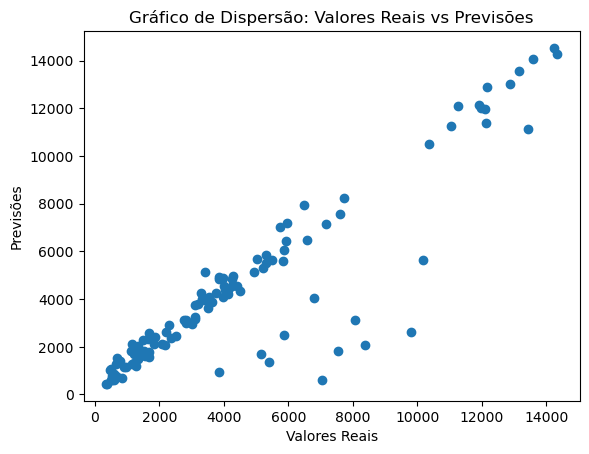

In [48]:
plt.scatter(Y2, Previsoes)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs Previsões")
plt.show()

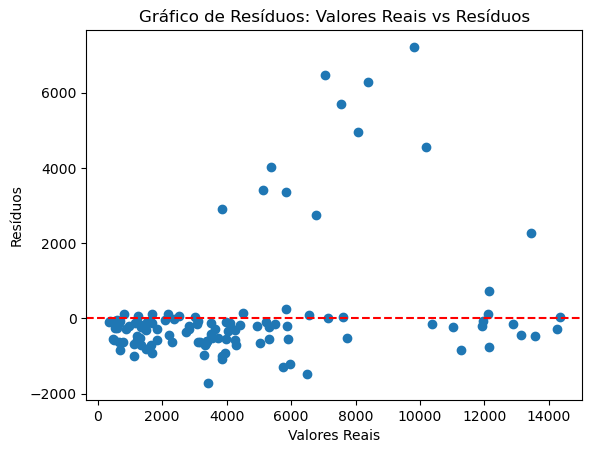

In [49]:
residuals = Y2 - Previsoes
plt.scatter(Y2, residuals)
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos: Valores Reais vs Resíduos")
plt.axhline(y=0, color='r', linestyle='--')  # Adiciona linha horizontal em y=0
plt.show()

O modelo performou de forma satisfatória na segunda base de dados, obtendo um score maior até que na base em que ele foi treinado.

## Fim do notebook.